### What is a tensor?

  A tensor consists of several feature vectors of a problem, nested within an organizational structure.
  This structure may or may not have a hierarchical relationship between its dimensions. If it is hierarchical,
  it means each layer further details the characteristics of the previous one. If it is not, it is simply for stacking
  the information for access and processing.
  

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_probability as tfp

### Constant vetors

In [ ]:
# Create a constant tensor
scalar = tf.constant(7)
scalar

# Number of dimensions
scalar.ndim

0

In [ ]:
# Create a vector
vector = tf.constant([10, 10])
vector

# Number of dimensions
vector.ndim

1

In [ ]:
# Create a matrix
matrix = tf.constant([
    [10,7],
    [7,10]
])
matrix

# Number of dimensions
matrix.ndim

2

In [ ]:
# Create a matrix with specified type
float_matrix = tf.constant([
    [2.,3.,],
    [5.,6.,],
    [8.,9.,]
], dtype=tf.float16)

float_matrix

# Number of dimensions
float_matrix.ndim

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[2., 3.],
       [5., 6.],
       [8., 9.]], dtype=float16)>

In [ ]:
# Create a tensor with 3 3x3 matrices
tensor = tf.constant([
    [[1,2,3],
    [4,5,6]],

    [[7,8,9],
     [10,11,12]],

     [[13,14,15],
     [16,17,18]]
])
tensor

# Number of dimensons
tensor.ndim

3

### Variable tensors

In [ ]:
changable_tensor = tf.Variable([10,7])
unchangable_tensor = tf.constant([10,7])
changable_tensor, unchangable_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7], dtype=int32)>)

In [ ]:
# Modifying the constant tensor ( it is not possible because it is a constant)
# unchangable_tensor[0] = 7 => TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment
unchangable_tensor[0].assign(7)


AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'assign'

In [ ]:
# Modifying the variable tensor ( it is not possible to reassign by indexing, ex: changable_tensor[0] = 7)
changable_tensor[0].assign(7)


<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([ 7, 10], dtype=int32)>

### Random tensors

In [ ]:
# The seed keeps the random result obtained
random_tensor = tf.random.Generator.from_seed(42)
random_tensor = random_tensor.normal(shape=(3,2))

random_tensor2 = tf.random.Generator.from_seed(42)
random_tensor2 = random_tensor2.normal(shape=(3,2))

random_tensor == random_tensor2

<tf.Tensor: shape=(3, 2), dtype=bool, numpy=
array([[ True,  True],
       [ True,  True],
       [ True,  True]])>

### Shuffling the order of the tensors

In [ ]:
# Util to use when inherent order interfer in learning
not_shuffled = tf.constant([
    [10,7],
    [3,4],
    [2,5]
])
shuffled = tf.random.shuffle(not_shuffled)
random_shuffle = tf.random.shuffle(not_shuffled)
not_shuffled, shuffled, random_shuffle


(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[10,  7],
        [ 3,  4],
        [ 2,  5]], dtype=int32)>,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 3,  4],
        [ 2,  5],
        [10,  7]], dtype=int32)>,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 3,  4],
        [10,  7],
        [ 2,  5]], dtype=int32)>)

In [ ]:
not_shuffled = tf.constant([
    [10,7],
    [3,4],
    [2,5]
])
# The seed keeps the random result obtained here too
random_shuffle = tf.random.shuffle(not_shuffled, seed=42)

Some random seeds from tensorflow

1.   
https://www.tensorflow.org/probability/api_docs/python/tfp/distributions

2.   
https://www.tensorflow.org/probability/examples/TensorFlow_Distributions_Tutorial

3.
https://www.tensorflow.org/api_docs/python/tf/random/set_seed


![representation of uniform, normal, binomial, poisson, exponencial and geometric distribution](https://miro.medium.com/v2/resize:fit:1400/1*dd3-HyJTY97-11lJIOMd9g.png)

In [ ]:
# Uniform distribution
tf.random.uniform(shape=(3,3))

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[0.7945664 , 0.37971497, 0.8337512 ],
       [0.86573696, 0.36209834, 0.3946886 ],
       [0.27644753, 0.5655577 , 0.2294153 ]], dtype=float32)>

In [ ]:
# Normal distribution
tf.random.normal(shape=(3,3))

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[-0.15753454, -1.6012067 , -0.35351112],
       [-0.12750977, -1.6371781 , -0.40670383],
       [-1.7137754 , -1.3810005 ,  1.5607347 ]], dtype=float32)>

In [ ]:
# Binomial distribution
tfp.distributions.Binomial(total_count=10, probs=0.5).sample(sample_shape=(3, 3))

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[5., 6., 4.],
       [3., 4., 4.],
       [6., 4., 3.]], dtype=float32)>

In [ ]:
# Poisson distribution
tfp.distributions.Poisson(rate=2.).sample(sample_shape=(3, 3))

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[6., 2., 1.],
       [1., 2., 1.],
       [3., 2., 3.]], dtype=float32)>

In [ ]:
# Exponensial distribution
tfp.distributions.Exponential(rate=1.).sample(sample_shape=(3, 3))

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1.2153938 , 1.2352152 , 0.10821146],
       [1.1070176 , 0.6632174 , 0.01751327],
       [2.3916256 , 0.2325474 , 0.99352086]], dtype=float32)>

In [ ]:
# Geometric distribution
tfp.distributions.Geometric(probs=0.5).sample(sample_shape=(3, 3))

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[2., 0., 0.],
       [0., 2., 1.],
       [0., 0., 0.]], dtype=float32)>

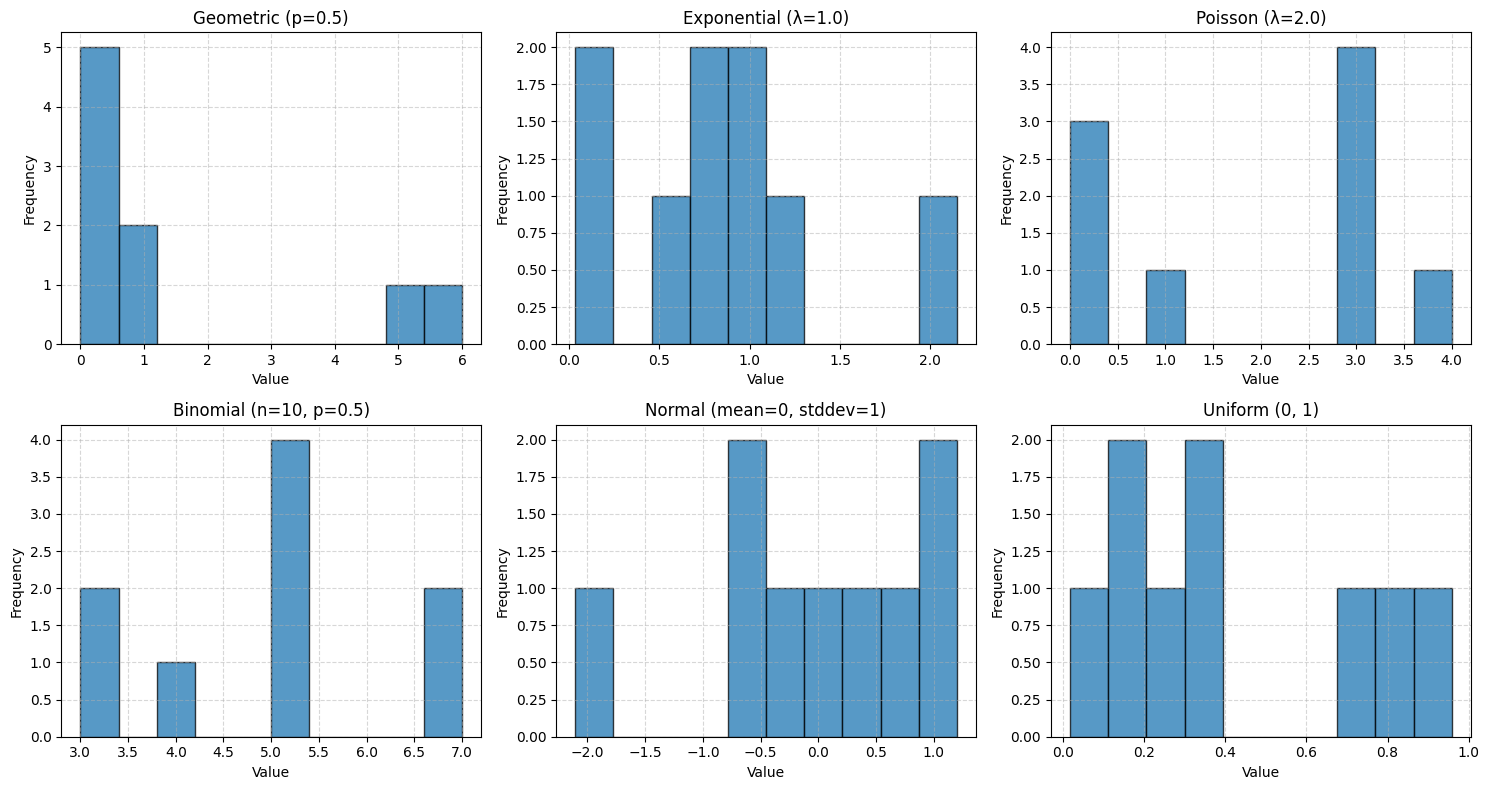

In [ ]:
# How the examples above look like

tfd = tfp.distributions

# Set a random seed for reproducibility
tf.random.set_seed(42)

# Sample shape
shape = (3, 3)

# Generate samples from each distribution
samples = {
    "Geometric (p=0.5)": tfd.Geometric(probs=0.5).sample(sample_shape=shape).numpy(),
    "Exponential (λ=1.0)": tfd.Exponential(rate=1.0).sample(sample_shape=shape).numpy(),
    "Poisson (λ=2.0)": tfd.Poisson(rate=2.0).sample(sample_shape=shape).numpy(),
    "Binomial (n=10, p=0.5)": tfd.Binomial(total_count=10, probs=0.5).sample(sample_shape=shape).numpy(),
    "Normal (mean=0, stddev=1)": tf.random.normal(shape=shape).numpy(),
    "Uniform (0, 1)": tf.random.uniform(shape=shape).numpy(),
}

# Create the figure
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

# Plot histograms
for ax, (title, data) in zip(axes, samples.items()):
    flat_data = data.flatten()
    ax.hist(flat_data, bins=10, edgecolor='black', alpha=0.75)
    ax.set_title(title)
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")
    ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

### Create tensors from numpy arrays

In [3]:
tf.ones(shape=(3,3))

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [4]:
tf.zeros(shape=(3,3))

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

In [6]:
# The main difference between Numpy arrays and Tensorflow tensors is that  tensors can be run on a GPU
# ( much faster for numerical computing )

import numpy as np

numpy_A = np.arange(1,25, dtype=np.int32)
numpy_A

# X = tf.constant(some_matrix) # capital for matrix or tensor
# y = tf.constant(vector) # non-capital for vector

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)

In [8]:
# Note that you can change the shape of the tensor, with the product of the dimensions equal to the number of elements
A = tf.constant(numpy_A, shape=(2,3,4))
B = tf.constant(numpy_A)
A, B

(<tf.Tensor: shape=(2, 3, 4), dtype=int32, numpy=
 array([[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8],
         [ 9, 10, 11, 12]],
 
        [[13, 14, 15, 16],
         [17, 18, 19, 20],
         [21, 22, 23, 24]]], dtype=int32)>,
 <tf.Tensor: shape=(24,), dtype=int32, numpy=
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24], dtype=int32)>)

### Getting information from tensors

| Attribute | Meaning | Code |
|---|---|---|
| Shape | The lenght (number of elements) of each of the dimensions of a tensor | tensor.shape |
| Rank | The number of tensor dimensions, A scalar has rank 0, a vector has rank 1, a matrix has a rank 2, a tensor has a rank n | tensor.ndim |
| Axis or dimension | A particular dimension of a tensor | tensor[0], tensor[:, 1]... |
| Size | Number of items in the tensor | tf.size(tensor) |

In [9]:
# Create a rank 4 tensor (4 dimensions)
rank_4_tensor = tf.zeros(shape=[2,3,4,5])
rank_4_tensor

<tf.Tensor: shape=(2, 3, 4, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)>

In [12]:
rank_4_tensor.shape, rank_4_tensor.ndim, tf.size(rank_4_tensor)

(TensorShape([2, 3, 4, 5]), 4, <tf.Tensor: shape=(), dtype=int32, numpy=120>)

In [17]:
print("Datatype of every element: ", rank_4_tensor.dtype)
print("Number of dimensions (rank): ", rank_4_tensor.ndim)
print("Shape of tensor: ", rank_4_tensor.shape)
print("Elements along the 0 axis: ", rank_4_tensor.shape[0])
print("Elements of the last axis:", rank_4_tensor.shape[-1])
print("Total number of elements:", tf.size(rank_4_tensor).numpy())

Datatype of every element:  <dtype: 'float32'>
Number of dimensions (rank):  4
Shape of tensor:  (2, 3, 4, 5)
Elements along the 0 axis:  2
Elements of the last axis: 5
Total number of elements: 120
